# Proyecto 1 del grupo 3: Desafío Empresarial - Análisis de Cohortes para los Pagos de Ironhack

## PARTICIPANTES

* Carla Fernández
* Jesús Ramírez
* Moisès Gómez 

## Introducción

IronHack Payments, una empresa de servicios financieros de vanguardia, ha estado ofreciendo soluciones innovadoras de adelanto de efectivo desde su creación en 2020. Con un compromiso de proporcionar adelantos de dinero gratuitos y precios transparentes, IronHack Payments ha logrado una base de usuarios sustancial. Como parte de su esfuerzo continuo por mejorar sus servicios y entender el comportamiento de los usuarios, IronHack Payments ha encargado un proyecto de análisis de cohortes.

## Visión General del Proyecto

En este proyecto, realizarás un análisis de cohortes exhaustivo basado en datos proporcionados por IronHack Payments. El objetivo principal es analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. Seguirás la evolución mensual de las métricas clave para estas cohortes, lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.

### Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

### Herramientas de Análisis de Datos

Se espera que realices el análisis de cohortes utilizando Python, aprovechando principalmente la biblioteca Pandas para la manipulación y análisis de datos. Sin embargo, el análisis principal debe realizarse utilizando Python.

### Análisis Exploratorio de Datos (EDA)

Antes de sumergirte en el análisis de cohortes, realiza un análisis exploratorio de datos para obtener una comprensión completa del conjunto de datos. Explora estadísticas clave, distribuciones y visualizaciones para identificar patrones y valores atípicos. El EDA te ayudará a tomar decisiones informadas sobre estrategias de preprocesamiento y análisis de datos.

### Análisis de la Calidad de Datos

Evalúa la calidad del conjunto de datos identificando valores faltantes, inconsistencias en los datos y posibles errores. Implementa pasos de limpieza y preprocesamiento de datos para garantizar la fiabilidad de tu análisis. Documenta cualquier problema de calidad de datos encontrado y los pasos tomados para abordarlos.

### Entregables

1. **Código en Python:** Proporciona código en Python bien documentado que realice el análisis de cohortes, incluyendo la carga de datos, preprocesamiento, creación de cohortes, cálculo de métricas y visualización.
2. **Informe de Análisis Exploratorio de Datos:** Prepara un informe que resuma los hallazgos de tu análisis exploratorio de datos. Incluye visualizaciones e insights que ayuden a entender el conjunto de datos.
3. **Informe de Análisis de la Calidad de Datos:** Documenta los resultados de tu análisis de calidad de datos, destacando cualquier problema y los pasos tomados para resolverlos.
4. **Presentación Corta:** Crea una presentación concisa (máximo de 4 diapositivas) que resuma tus hallazgos del análisis de cohortes y las perspectivas clave obtenidas del EDA y el análisis de calidad de datos. Esta presentación debe ser adecuada para compartir con el equipo de IronHack Payments.

In [1]:
# Interpretación del problema
# La frecuencia de uso del servicio, tendremos en cuenta los paramtros 'user_id' y 'deleted_id' para saber la frecuencia.
# Los cohortes estan definidos por la fecha del 'create at' de cash y fees.
# Los ingresos generados por la cohorte, el 'amount' del cash * el 'total amount' del fees y agrupados por los meses.
# La Tasa de incidentes, esta relacionado con el 'Type' de Fees.

# Saber si el ID de cash y fees son los mismos
# 'user_id' y 'deleted_acount_id' son parametros que estan vinculados.

# Preparar datos

En esta sección haremos una primera exploración ràpida para la limpieza de los datos.

In [2]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carga de los datasets
lexique = pd.read_excel("./project_dataset/Lexique - Data Analyst.xlsx")
cash = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
fees = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")

In [4]:
lexique.head(12)

,Column name,Description
0,id,Unique ID of the fee object
1,type,Type of fee\nPossible values are :\n\n- instan...
2,status,Status of the fees (= does the fees was succes...
3,category,Describe the reason of the incident fee.\n\n2 ...
4,reason,Description of the fee
5,created_at,Timestamp of the fee's creation
6,updated_at,Timestamp of the latest fee's details update
7,paid_at,Timestamp of the fee's payment
8,from_date,Apply only to postpone fees. Initial date of r...
9,to_date,Apply only to postpone fees. New date of reimb...


In [5]:
lexique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16375 entries, 0 to 16374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column name  16003 non-null  object
 1   Description  13 non-null     object
dtypes: object(2)
memory usage: 256.0+ KB


In [6]:
# Observamos que el lexique contine un total de 13 valores diferentes de none y que el column_name indica el encabezado del documento de fees y el description contiene la 
# descripción de las celdas. Tambien observamos que tiene 16003 filas vacias.

In [7]:
#TODO: Limpiar filas sobrantes.

In [8]:
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [9]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [10]:
# Podemos obervar que el Fees tiene 13 columnas y muchas de ellas tiene valor None. 

In [11]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [12]:
fees.sample(10)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
12790,3619,12271.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 12271,2020-08-12 21:53:47.945212+00,2020-10-13 14:25:09.280465+00,2020-09-06 19:47:12.935557+00,NaN,NaN,after
3140,11394,16902.0,postpone,accepted,NaN,5.0,Postpone Cash Request 16902,2020-10-06 16:03:14.748587+00,2020-10-13 14:25:09.033176+00,2020-10-06 16:03:18.415222+00,2020-10-25 23:51:00+00,2020-11-06 11:00:00+00,before
4760,13200,16319.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 16319,2020-10-13 20:35:58.922063+00,2020-10-13 20:35:58.922088+00,NaN,2020-10-14 10:00:00+00,2020-11-08 11:00:00+00,after
754,19977,16545.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 16545,2020-10-30 06:52:20.299151+00,2020-10-30 06:52:20.299174+00,NaN,2020-11-05 11:00:00+00,2020-11-20 11:00:00+00,before
7368,16160,23258.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23258,2020-10-23 03:45:01.073174+00,2020-10-23 03:45:01.073195+00,2020-11-04 19:31:52.483884+00,NaN,NaN,after
8943,1220,3229.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-08 22:18:51.900773+00,2020-10-13 14:25:02.228912+00,2020-11-27 06:04:15.850253+00,NaN,NaN,after
13696,11807,19749.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19749,2020-10-08 01:23:36.578703+00,2020-10-13 14:25:10.87302+00,2020-11-05 20:14:25.866357+00,NaN,NaN,after
2554,10450,14181.0,postpone,accepted,NaN,5.0,Postpone Cash Request 14181,2020-10-02 07:51:02.524879+00,2020-10-13 14:25:05.707672+00,2020-10-02 07:51:07.081219+00,2020-10-01 22:00:00+00,2020-10-16 07:50:58.731+00,before
14771,8763,16466.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 16466,2020-09-23 02:19:07.54436+00,2020-10-13 14:25:13.166086+00,2020-10-06 19:47:26.09252+00,NaN,NaN,after
5775,20649,26677.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26677,2020-10-31 10:45:15.542463+00,2020-10-31 10:45:15.542494+00,2020-12-01 04:53:27.599283+00,NaN,NaN,after


In [13]:
fees['total_amount'].describe()

count    21061.000000
mean         5.000237
std          0.034453
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: total_amount, dtype: float64

In [14]:
fees.groupby('total_amount').count()

,id,cash_request_id,type,status,category,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
total_amount,,,,,,,,,,,,
5.0,21060,21056,21060,21060,2196,21060,21060,21060,15530,7766,7766,21060
10.0,1,1,1,1,0,1,1,1,1,0,0,1


In [15]:
#El total amount es 10.0 o 5.0

In [16]:
fees.groupby('status').count()

,id,cash_request_id,type,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
status,,,,,,,,,,,,
accepted,14841,14841,14841,1560,14841,14841,14841,14841,14523,2985,2985,14841
cancelled,4938,4934,4938,97,4938,4938,4938,4938,90,4780,4780,4938
confirmed,88,88,88,19,88,88,88,88,2,0,0,88
rejected,1194,1194,1194,520,1194,1194,1194,1194,916,1,1,1194


In [17]:
#Tiene 4 estados: accepted, cancelled, confirmed, rejected

In [18]:
set(cash.columns) & set(fees.columns)

{'created_at', 'id', 'status', 'updated_at'}

In [19]:
# Tanto fees como fash estan vinculados a estos 4 identificadores.

#Variables
##Frecuencia de uso de servicio
cash.user_id
cash.deleted_account_id (cuenta como uso?)

created_month a extraer de 'created_at'

La frecuencia se refiere a la cohorte?

In [20]:
cash[cash['user_id'] == 231.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN



# Pregunta 1

Frecuencia de Uso del Servicio: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.


Puntos a tener encuenta:

a. Necesitamos calcular los cohortes (año y mes del create_at)
  * se tiene que revisar limpieza de create_at (está en cash y en fees) (ex. nulos)
  * En principio consideramos que si es nulo el create_at, no se ha hecho el préstamo

b. Necesitamos el user_id (y posible deleted_account_id)
  * limpieza pues hay usuarios eliminados (unificaremos user_id y deleted_account_id)
  * comprobar que no queden nulos
 
c. Encontrar el cohorte de cada usuario (es el primer préstamo)
   * comprobar que todos los usuarios tienen cohorte. Pueden haber usuarios que no han solicitado ningún adelanto? (frecuencia 0)
   * el menor cohorte de cada user_id unificado
     
d. Encontrar el número de préstamos de un usuario
   * el total (count) de préstamos de cada usuario que tenga cohorte

e. Asociar a cada cohorte la frecuencia
   * generar charts

In [21]:
# 1a. Estudiamos cálculo de cohortes
total_filas = len(cash)
print(f"El total de filas es: {total_filas}")
cash.info()
print("Comprobamos que no hay nulos en el cash.created_at")

El total de filas es: 23970
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  rec

In [22]:
# Creamos una columna con la cohorte en cash

# cash['año_mes'] = cash['created_at'].dt.date  # versión alternativa que no funciona en todas las instalaciones

cash['año_mes'] = pd.to_datetime(cash['created_at']).dt.strftime('%Y-%m')
cash



,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10


In [23]:
# Crear una columna que contenga el user_id y si es NaN, que contenga el deleted_account_id. Le llamamos: unified_user_id
cash['unified_user_id'] = cash['user_id'].fillna(cash['deleted_account_id'])
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,804.0
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,231.0
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,191.0
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,761.0
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05,7686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10,13681.0
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,30367.0
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,82122.0
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10,64517.0


In [24]:
# Comprobamos si han quedado NaNs en unified_user_id
print(f"unified_user_id: no nulos {cash['unified_user_id'].notna().sum()} y nulos {cash['unified_user_id'].isna().sum()}")

unified_user_id: no nulos 23970 y nulos 0


In [25]:
# 1.c. Encontrar el cohorte de cada usuario (es el primer préstamo)
# Primero filtraremos aquellos prestamos que no son correctos
print(f"Los diferentes status son: {cash['status'].unique()}")

user_cohorte = cash.groupby('unified_user_id')['año_mes'].min()     # también puede ser .first() ya que aparecen ordenados por created_at|\| 
print("Cohortes por usuario")
print(user_cohorte.head(10))

# Comprobemos que el usuario 231 tenga la cohorte esperada (2020-01 y no 2019-12 porque está rejected)
print("Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01")
print(user_cohorte[231])

print(f"El número total de usuarios con cohorte es {len(user_cohorte)} de los {cash['unified_user_id'].count()} usuarios originales")

Los diferentes status son: ['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']
Cohortes por usuario
unified_user_id
34.0    2020-04
35.0    2019-12
47.0    2019-11
52.0    2019-12
53.0    2019-12
66.0    2020-04
68.0    2019-12
70.0    2020-04
72.0    2020-01
73.0    2020-01
Name: año_mes, dtype: object
Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01
2019-12
El número total de usuarios con cohorte es 11793 de los 23970 usuarios originales


In [26]:
# 1d. Encontrar el número de préstamos de un usuario
prestamos_por_usuario = cash.groupby('unified_user_id')['unified_user_id'].count()
print(prestamos_por_usuario.head(10))

# comprobación usuario conocido 231 se espera 10 préstamos
print("Comprobación del número de préstamos del conocido para el usuario 231. Se espera 10")
print(prestamos_por_usuario[231])

unified_user_id
34.0     1
35.0     7
47.0     8
52.0     4
53.0     4
66.0     1
68.0     1
70.0     1
72.0    12
73.0     7
Name: unified_user_id, dtype: int64
Comprobación del número de préstamos del conocido para el usuario 231. Se espera 10
10


In [27]:
# Crear un dataframe con los dos serials (prestamos_por_usuario, user_cohorte)
# Agrupar por cohorte y sumar los préstamos
# Graficar Eje "X" tiempo(x mes) y Eje"Y" cantidad de pedidos. El grafico debe responder: Cuantos pedidos hizo cada cohorte por mes?

In [28]:
# Nuevo objetivo es conseguir un dataframe que contenga la cohorte real de cada usuario y el mes real en el que se está realizando el pedido

In [29]:
cash['cohorte'] = cash['unified_user_id'].map(user_cohorte)
cash[cash['unified_user_id'] == 231]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,231.0,2019-12
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN,2020-06,231.0,2019-12
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN,2020-02,231.0,2019-12
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN,2020-01,231.0,2019-12
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN,2020-07,231.0,2019-12
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN,2020-08,231.0,2019-12
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN,2020-10,231.0,2019-12
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN,2020-09,231.0,2019-12


In [30]:
#Nuevo objetivo: cuantos pedidos por mes
adelantos_mes_serie = cash.groupby(['año_mes','cohorte'])['año_mes'].count()    # alternativa .size()
adelantos_mes = adelantos_mes_serie.to_frame(name='adelantos').reset_index()
adelantos_mes

,año_mes,cohorte,adelantos
0,2019-11,2019-11,1
1,2019-12,2019-11,1
2,2019-12,2019-12,288
3,2020-01,2019-12,106
4,2020-01,2020-01,117
...,...,...,...
78,2020-11,2020-07,7
79,2020-11,2020-08,10
80,2020-11,2020-09,20
81,2020-11,2020-10,15


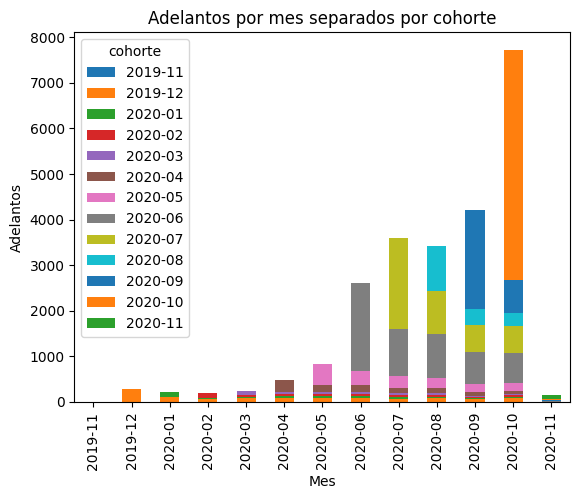

In [31]:
df_pivot = adelantos_mes.pivot(index='año_mes', columns='cohorte', values='adelantos').fillna(0)
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.title('Adelantos por mes separados por cohorte')
plt.show()

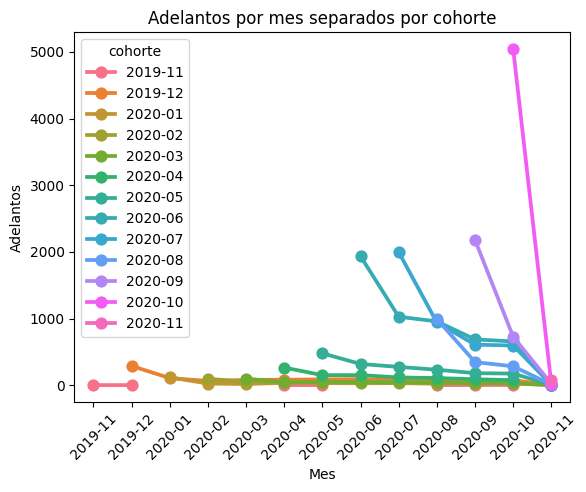

In [32]:
sns.pointplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte', marker='o')
plt.title('Adelantos por mes separados por cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.show()

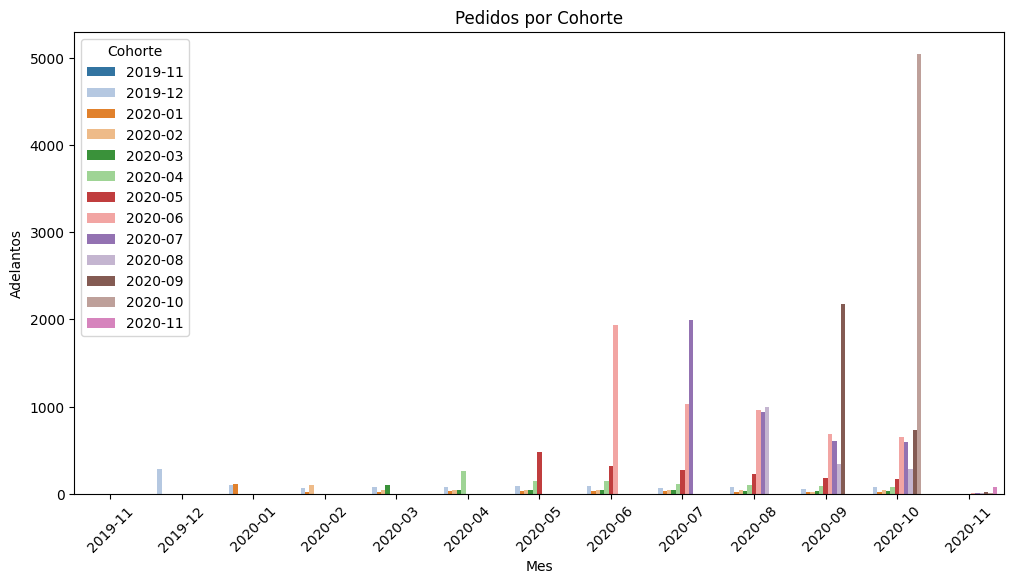

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte',palette='tab20')
plt.title('Pedidos por Cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.legend(title='Cohorte')
plt.show()

In [34]:
#Paso intermedio, se observa cuantos adelantos hay por mes
adelantos_mes_serie = cash.groupby('año_mes')['año_mes'].count()    # alternativa .size()
adelantos_mes = adelantos_mes_serie.to_frame(name='adelantos').reset_index()
adelantos_mes

,año_mes,adelantos
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,837
7,2020-06,2615
8,2020-07,3601
9,2020-08,3417


# Pregunta 2

Tasa de Incidentes: Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

Posibles variables necesarias
  * Type
  * Status
  * Category

Analizando las variables llegamos a la conclusión de que si hay Categoría es porque existe una incidencia.

Se debe "unir" las dos database para poder obtener la variación en cada cohorte. Las variables relacionadas en cada db son: ID en Cash y cash_request_id en Fees


Objetivo: poder comparar los incidentes por cohortes.

Pasos:

2a. Merge las dos databases por medio de las variables relacionadas (ID en Cash y cash_request_id en Fees)    
2b. Limpiar (filtrar) las entradas por incidentes de pagos (extraer los nulos)                
2c. Luego hacer la identificación de incidentes por cohortes                      
2d. Visualizar tasa de incidentes por cohortes
 

In [35]:
fees["type"].unique()

array(['instant_payment', 'incident', 'postpone'], dtype=object)

In [36]:
fees["status"].unique()

array(['rejected', 'accepted', 'cancelled', 'confirmed'], dtype=object)

In [37]:
fees["category"].unique()

array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
      dtype=object)

In [38]:
print("cash\n",cash[cash['id']==23371.0])

cash
           id  amount      status                     created_at  \
15059  23371   100.0  money_back  2020-10-23 10:10:43.278601+00   

                          updated_at  user_id moderated_at  \
15059  2020-12-18 13:10:25.031184+00  81575.0          NaN   

       deleted_account_id      reimbursement_date cash_request_received_date  \
15059                 NaN  2020-11-04 22:00:00+00                 2020-10-27   

                     money_back_date transfer_type  \
15059  2020-11-04 19:34:37.399122+00       instant   

                             send_at recovery_status reco_creation  \
15059  2020-10-23 10:10:52.894637+00             NaN           NaN   

      reco_last_update  año_mes  unified_user_id  cohorte  
15059              NaN  2020-10          81575.0  2020-10  


In [39]:
print("fees\n",fees[fees['id']==11714.0])

fees
          id  cash_request_id      type    status category  total_amount  \
3743  11714          12310.0  postpone  accepted      NaN           5.0   

                           reason                     created_at  \
3743  Postpone Cash Request 12310  2020-10-07 17:34:26.815441+00   

                         updated_at                        paid_at  \
3743  2020-10-13 14:25:17.743991+00  2020-10-07 17:34:36.221205+00   

                   from_date                 to_date charge_moment  
3743  2020-10-10 10:00:00+00  2020-11-09 11:00:00+00        before  


In [40]:
#2a.

cash_fees = pd.merge(cash, fees, left_on='id', right_on='cash_request_id')
cash_fees.sample(5)


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
17946,23031,100.0,money_back,2020-10-22 11:08:08.903223+00,2020-12-18 13:13:04.892327+00,82112.0,NaN,NaN,2020-11-18 23:51:00+00,2020-10-23,...,accepted,NaN,5.0,Instant Payment Cash Request 23031,2020-10-22 11:08:47.045374+00,2020-10-22 11:08:47.045397+00,2020-11-26 08:11:12.805357+00,NaN,NaN,after
6971,8277,100.0,money_back,2020-07-15 16:35:11.986713+00,2020-12-18 13:09:51.48267+00,31952.0,2020-07-17 10:39:07.329416+00,NaN,2020-09-09 22:00:00+00,2020-07-21,...,cancelled,NaN,5.0,Postpone Cash Request 8277,2020-09-08 08:19:27.653449+00,2020-10-13 14:25:09.562417+00,NaN,2020-09-09 22:00:00+00,2020-09-22 08:19:20.666+00,after
15726,21964,100.0,money_back,2020-10-18 14:27:24.335706+00,2020-12-18 13:12:18.057508+00,78183.0,NaN,NaN,2020-11-04 23:00:00+00,2020-10-20,...,accepted,NaN,5.0,Instant Payment Cash Request 21964,2020-10-18 14:27:59.120053+00,2020-10-18 14:27:59.120075+00,2020-10-30 16:56:08.947584+00,NaN,NaN,after
19735,23863,25.0,money_back,2020-10-24 03:34:23.107773+00,2020-12-18 13:14:20.047354+00,12842.0,NaN,NaN,2020-11-02 22:00:00+00,NaN,...,rejected,NaN,5.0,Instant Payment Cash Request 23863,2020-10-24 03:34:59.379187+00,2020-10-24 03:34:59.379208+00,2020-11-07 05:17:58.872615+00,NaN,NaN,after
17620,25890,25.0,money_back,2020-10-29 00:18:53.398296+00,2020-12-18 13:12:56.502688+00,48793.0,NaN,NaN,2020-11-06 22:00:00+00,2020-10-30,...,accepted,NaN,5.0,Instant Payment Cash Request 25890,2020-10-29 00:19:30.350246+00,2020-10-29 00:19:30.350269+00,2020-11-06 07:05:31.104494+00,NaN,NaN,after


In [56]:
#2b. Limpiar
print("Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago")
incidentes = cash_fees[cash_fees['category'].notna()]
incidentes.sample(5)

Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
7677,14503,100.0,money_back,2020-09-04 10:47:04.779037+00,2020-12-18 13:10:05.009938+00,4314.0,NaN,NaN,2020-10-27 11:00:00+00,2020-09-08,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-18 22:28:04.788774+00,2020-10-18 22:28:04.788795+00,2020-10-25 08:37:07.400069+00,NaN,NaN,after
14767,17997,100.0,money_back,2020-09-26 15:20:21.202349+00,2020-12-18 13:12:00.986477+00,51919.0,2020-09-26 17:22:55.021387+00,NaN,2020-10-05 22:00:00+00,2020-09-27,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-18 22:18:21.487673+00,2020-10-18 22:18:21.487695+00,2020-11-05 15:11:37.222218+00,NaN,NaN,after
19403,16394,100.0,money_back,2020-09-16 09:55:20.411357+00,2020-12-18 13:13:56.030206+00,16775.0,2020-09-16 13:18:34.62921+00,NaN,2020-10-03 09:55:20.368939+00,2020-09-17,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-11 22:48:27.082144+00,2020-10-13 14:25:18.661758+00,2020-11-06 04:35:04.745803+00,NaN,NaN,after
18631,10229,100.0,money_back,2020-07-31 07:49:11.437089+00,2020-12-18 13:13:31.53896+00,NaN,2020-07-31 10:02:37.654809+00,18881.0,2020-08-29 22:00:00+00,2020-08-03,...,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-06 00:24:16.482804+00,2020-10-13 14:25:06.707118+00,2020-11-02 01:35:09.885238+00,NaN,NaN,after
1165,18514,50.0,direct_debit_rejected,2020-09-30 08:26:13.646634+00,2020-10-25 22:11:52.74158+00,NaN,2020-09-30 08:40:59.819352+00,15491.0,2020-10-16 10:00:00+00,2020-10-01,...,confirmed,rejected_direct_debit,5.0,rejected direct debit,2020-10-25 22:11:52.528801+00,2020-10-25 22:11:52.52882+00,NaN,NaN,NaN,after


In [42]:
#2c. Agrupación por cohortes
print("Número de incidencias por cohorte")
df_incidencias = incidentes.groupby('cohorte')['cohorte'].count().to_frame(name='incidencias').reset_index()
df_incidencias.sample(5)

Número de incidencias por cohorte


,cohorte,incidencias
9,2020-09,195
8,2020-08,149
3,2020-03,32
5,2020-05,234
7,2020-07,576


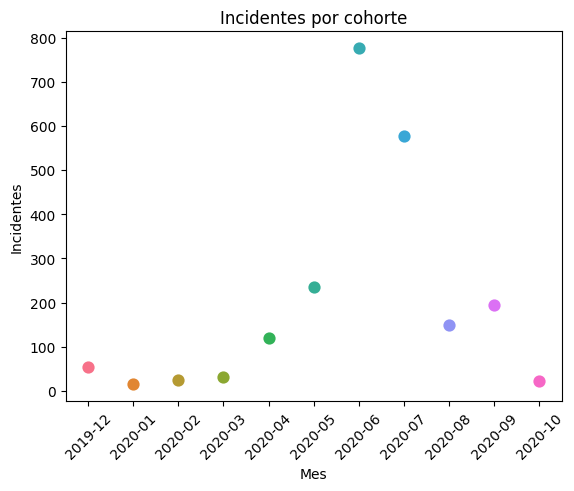

In [43]:
#2d. Visualizar tasa de incidentes por cohortes

sns.pointplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte', marker='o')
plt.title('Incidentes por cohorte')
plt.xlabel('Mes')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()

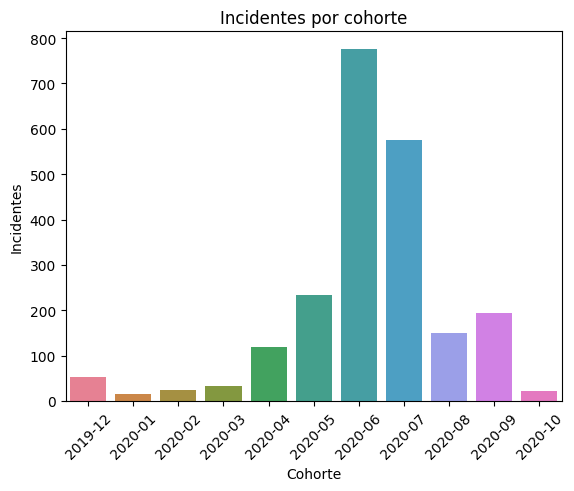

In [44]:
sns.barplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte')
plt.title('Incidentes por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()

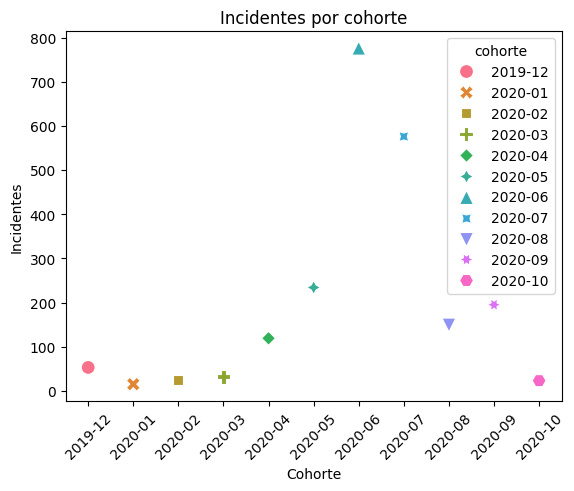

In [45]:
sns.scatterplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte', style='cohorte', s=100)
plt.title('Incidentes por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()


 # Pregunta 3

Ingresos Generados por la Cohorte: Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
 

Variables a utilizar: 
 * Cohorte
 * Amount (cash)
 * total_amount (fees)
 * año_mes

Según documentación el cash.status:

Status of the CR.

Possibles values are : 
- approved : CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation
- money_sent : We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history)
- rejected : The CR needed a manual review and was rejected
- pending : The CR is pending a manual review from an analyst
- transaction_declined : We failed to send the funds to the customer
- waiting_user_confirmation : The user needs to confirm in-app that he want the CR (for legal reasons)
- direct_debit_rejected : Our last attempt of SEPA direct debit to charge the customer was rejected 
- canceled : The user didn't confirm the cash request in-app, we automatically canceled it
- direct_debit_sent : We sent/scheduled a SEPA direct debit to charge the customer account. The result of this debit is not yet confirmed
- waiting_reimbursement : We were not able to estimate a date of reimbursement, the user needs to choose one in the app.
- active : Funds were received on the customer account.
- money_back : The CR was successfully reimbursed.

Status of the fees (= does the fees was successfully charged)

Possibles values are : 
- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.
- rejected : the last attempt to charge the fee failed.
- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.
- accepted : fees were successfully charged

Pasos: 

3a. Crear una columna con el año_mes de paid_at 
 - Consideramos paid_at como el mes en que se produce realmente el ingres 
  - Serà necesario eliminar nulos pues no todos los anticipos habran sido pagos

3b. Obtener el valor de los ingresos generados agrupados por año_mes_ingreso y cohorte

     -el ingreso se considera la suma d:
       - las entradas de cash con status money_back
       - las entradas de fees con status accepted
    - La justificación es:
       - sólo se ha recuperado el dinero del prestamo cuando cash.status es money_back
       - sólo se ha obtenido fees de las entradas que fees.status es accepted

    - La fecha del ingreso se considera:
       - la money_back_date para cash pues según la documentación: Date where the CR was considered as money back. It's either the paid_by_card date or the date were we considered that's the direc debit have low odds to be rejected (based on business rules)
       - la paid_at de fees pues la documentación dice: Timestamp of the fee's payment

    - Algunos casos peculiares:
       - Pueden haber entradas en cash que se han ingresado (status == money_back) pero que no se le ha aplicado un fee
         Lo sabemos porque mientras en fees (limpios y cobrados) hay 14523, en cash hay 16207. Por tanto, algunos cash no tienen fee
         Consideramos que los que no tienen fees forman parte de el servicio gratuito que indica la descripción del problema.
       - Pueden haber entradas en fees que se han ingresado (status == accepted) pero que no se ha cobrado el cash
         Hemos comprobado que todos los fees cobrados (con fecha paid_at no nulo) tienen su correspondiente entrada en cash, aunque no siempre con estado money_back. Ej. 6606 tiene cash.status direct_debit_rejected, mientras que ha sido cobrado su fee.
         Consideramos en estos casos que se ha producido el ingreso del fee pero no aun (quizás nunca) el de cash
       - Puede ser que por una incidencia, se realicen más de un fee mensual sobre el mismo id. En cualquier caso, consideramos que para éste estudio nos interesa el mes de ingreso y no a qué CR corresponde. Consideramos que sigue mandando la columna paid_at y el status accepted, independientemente de las incidencias estudiadas en la métrica anterior.t

3c. Visualizar los resultados

    - dado que los datos se parecen a los de anticipos por mes de la pregunta anterior,
      los gráficos podrían ser similares en tipología.
      Seria de esperar también una similitud en la forma de los gráficos aunque desplazada
      a la derecha pues los prestamos se realizan antes que los ingresostdos

In [46]:
# 3a. Añadimos la columna año_mes_ingreso
# Primero filtramos las entradas no pagadas
cash_fees_paid = cash_fees[cash_fees['paid_at'].notna()].copy()   # Es necesario copy() para evitar el SettingWithCopyWarning
cash_fees_paid['año_mes_ingreso'] = pd.to_datetime(cash_fees_paid['paid_at'], format='mixed').dt.strftime('%Y-%m')
cash_fees_paid[cash_fees_paid['status_y'] == 'accepted']

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,año_mes_ingreso
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,...,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after,2020-11
13,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,NaN,5.0,Postpone Cash Request 20639,2020-10-17 05:30:42.507784+00,2020-10-17 05:30:42.507814+00,2020-10-17 05:30:46.780335+00,2020-10-27 17:05:21.138+00,2020-10-30 23:00:00+00,before,2020-10
14,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,NaN,5.0,Instant Payment Cash Request 20639,2020-10-15 06:29:32.340345+00,2020-10-15 06:29:32.340366+00,2020-10-31 18:58:22.280263+00,NaN,NaN,after,2020-10
16,2211,100.0,money_back,2020-05-27 10:23:16.961762+00,2020-06-28 15:40:27.16607+00,3045.0,2020-05-27 13:07:30.446702+00,NaN,2020-07-31 22:00:00+00,2020-05-29,...,NaN,5.0,Postpone Cash Request 2211,2020-06-28 15:40:20.807831+00,2020-10-13 14:25:01.580886+00,2020-06-28 15:40:27.730873+00,2020-07-01 22:00:00+00,2020-07-31 22:00:00+00,before,2020-06
31,6606,100.0,direct_debit_rejected,2020-07-04 16:46:38.513992+00,2020-11-01 22:27:03.947487+00,28368.0,2020-07-05 18:18:01.266954+00,NaN,2020-08-30 05:34:55.649+00,2020-07-07,...,NaN,5.0,Postpone Cash Request 6606,2020-07-07 05:34:57.746068+00,2020-10-13 14:25:02.07258+00,2020-07-07 05:35:03.667748+00,2020-07-30 22:00:00+00,2020-08-15 05:34:55.649+00,before,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after,2021-02
21053,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before,2020-10
21054,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after,2021-02
21055,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before,2020-10


In [47]:
fees[(fees['status'] == 'accepted') & (fees['paid_at'].notna())]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
5,17029,24052.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24052,2020-10-24 12:22:27.666102+00,2020-10-24 12:22:27.666124+00,2020-11-09 19:10:14.47407+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20997,12867,20616.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 20616,2020-10-12 13:54:28.690344+00,2020-10-13 14:25:18.882201+00,2021-02-06 20:17:49.314469+00,NaN,NaN,after
21002,15712,17921.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-21 22:22:56.19283+00,2020-10-21 22:22:56.192851+00,2021-02-08 03:14:56.324535+00,NaN,NaN,after
21009,14209,15088.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:49:42.0478+00,2020-10-16 23:49:42.04783+00,2021-02-07 03:10:48.554195+00,NaN,NaN,after
21039,18244,12520.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-27 00:16:30.736241+00,2020-10-27 00:16:30.736269+00,2021-02-12 04:15:27.825054+00,NaN,NaN,after


In [48]:
cash[(cash['status'] == 'money_back') & (cash['money_back_date'].notna())]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,2020-07-06 03:36:03.023521+00,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00,2020-05,9489.0,2020-05
11,1794,100.0,money_back,2020-05-14 21:11:47.393326+00,2020-06-03 05:11:35.312872+00,778.0,2020-05-15 09:11:17.272832+00,NaN,2020-05-29 21:11:46.695+00,2020-05-17,2020-06-03 05:11:35.312616+00,regular,NaN,completed,2020-05-29 21:21:01.362364+00,2020-06-03 05:11:35.319122+00,2020-05,778.0,2019-12
13,2122,100.0,money_back,2020-05-22 12:47:42.741369+00,2020-06-13 06:36:34.188372+00,8218.0,2020-05-23 14:29:15.376466+00,NaN,2020-06-15 22:00:00+00,2020-05-27,2020-06-13 06:36:34.188042+00,regular,NaN,NaN,NaN,NaN,2020-05,8218.0,2020-04
43,1629,100.0,money_back,2020-05-08 11:02:44.881355+00,2020-06-10 08:20:10.399242+00,9068.0,2020-05-08 11:07:03.575647+00,NaN,2020-06-03 22:00:00+00,2020-05-12,2020-06-10 08:20:10.398977+00,regular,NaN,NaN,NaN,NaN,2020-05,9068.0,2020-05
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00,NaN,NaN,NaN,2020-10,21465.0,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00,2020-09,20064.0,2020-06
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10,13681.0,2020-06
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,30367.0,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,82122.0,2020-10


In [74]:
# merge de cash y fees para calcular ingresos
# Nos interesa que no hayan entradas de fees que no esten en cash porque si no no disponemos de cohorte (user_id)
# Escogemos how='left' porque 'outer' nos entrega 4 entradas de fees que no están en cash, y no nos interesan pues
# no podremos asociarlas a ningún user_id, ni por tanto, a ningún cohorte.
cash_money_back = cash[cash['status'] == 'money_back']
fees_accepted = fees[fees['status'] == 'accepted']
# XXX DUDA: seguro que tenemos que filtrar antes? (hay no money_back que si se han ingresado el fees, hay que considerar las incidencias: instant_payment/incidents)
#   Si filtras cash por money_back habrá entradas en fees que no tendrán su correspondiente user_id
#   Si filras fees por accepted no pasa nada pues de todas formas su entrada cash estará o no independiente de fees (por how='left')
merge_ingresos = pd.merge(cash_money_back, fees_accepted, left_on='id', right_on='cash_request_id', how='left')
seleccion = merge_ingresos[['id_x', 'status_x', 'cash_request_id', 'status_y', 'amount', 'total_amount', 'user_id', 'cohorte', 'paid_at', 'money_back_date']]
seleccion


,id_x,status_x,cash_request_id,status_y,amount,total_amount,user_id,cohorte,paid_at,money_back_date
0,2145,money_back,NaN,NaN,100.0,NaN,9489.0,2020-05,NaN,2020-07-06 03:36:03.023521+00
1,1794,money_back,NaN,NaN,100.0,NaN,778.0,2019-12,NaN,2020-06-03 05:11:35.312616+00
2,2122,money_back,NaN,NaN,100.0,NaN,8218.0,2020-04,NaN,2020-06-13 06:36:34.188042+00
3,1629,money_back,NaN,NaN,100.0,NaN,9068.0,2020-05,NaN,2020-06-10 08:20:10.398977+00
4,23534,money_back,23534.0,accepted,25.0,5.0,21465.0,2020-09,2020-11-06 07:16:22.014422+00,2020-11-06 07:16:21.845479+00
...,...,...,...,...,...,...,...,...,...,...
19273,25243,money_back,25243.0,accepted,50.0,5.0,NaN,2020-10,2020-12-01 13:26:53.839829+00,2020-12-01 13:26:53.787672+00
19274,22357,money_back,22357.0,accepted,100.0,5.0,82122.0,2020-10,2020-10-22 09:52:50.145043+00,2021-02-05 12:19:30.626289+00
19275,22357,money_back,22357.0,accepted,100.0,5.0,82122.0,2020-10,2021-02-05 12:19:30.685779+00,2021-02-05 12:19:30.626289+00
19276,20256,money_back,20256.0,accepted,100.0,5.0,64517.0,2020-10,2020-10-30 17:08:21.416796+00,2021-02-05 13:14:19.689906+00


In [49]:
# 3b. Ahora creamos la columna año_mes_ingreso como suma de amount + total_amount
# En una primera idea, hemos pensado que total_amount corespondería a un % sobre el amount, pero finalmente hemos optado por considerarlo un valor fijo por usar el servicio.
cash_fees_paid['ingresos'] = cash_fees_paid['amount'] + cash_fees_paid['total_amount']
cash_fees_paid.head()

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,año_mes_ingreso,ingresos
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,...,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after,2020-11,30.0
13,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,5.0,Postpone Cash Request 20639,2020-10-17 05:30:42.507784+00,2020-10-17 05:30:42.507814+00,2020-10-17 05:30:46.780335+00,2020-10-27 17:05:21.138+00,2020-10-30 23:00:00+00,before,2020-10,55.0
14,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,5.0,Instant Payment Cash Request 20639,2020-10-15 06:29:32.340345+00,2020-10-15 06:29:32.340366+00,2020-10-31 18:58:22.280263+00,NaN,NaN,after,2020-10,55.0
16,2211,100.0,money_back,2020-05-27 10:23:16.961762+00,2020-06-28 15:40:27.16607+00,3045.0,2020-05-27 13:07:30.446702+00,NaN,2020-07-31 22:00:00+00,2020-05-29,...,5.0,Postpone Cash Request 2211,2020-06-28 15:40:20.807831+00,2020-10-13 14:25:01.580886+00,2020-06-28 15:40:27.730873+00,2020-07-01 22:00:00+00,2020-07-31 22:00:00+00,before,2020-06,105.0
27,3898,100.0,direct_debit_rejected,2020-06-18 10:43:16.007268+00,2020-08-11 22:28:00.013578+00,16861.0,2020-06-18 14:30:54.217567+00,NaN,2020-06-30 22:00:00+00,2020-06-20,...,5.0,rejected direct debit,2020-07-05 22:35:44.300285+00,2020-12-15 17:07:43.006634+00,2020-08-06 08:42:18.59726+00,NaN,NaN,after,2020-08,105.0


In [51]:
ingresos_mes_serie = cash_fees_paid.groupby(['año_mes_ingreso','cohorte'])['ingresos'].sum()    
ingresos_mes = ingresos_mes_serie.to_frame(name='ingresos').reset_index()
ingresos_mes

,año_mes_ingreso,cohorte,ingresos
0,2020-06,2019-12,210.0
1,2020-06,2020-01,210.0
2,2020-06,2020-02,420.0
3,2020-06,2020-03,420.0
4,2020-06,2020-04,835.0
...,...,...,...
88,2021-02,2020-07,2540.0
89,2021-02,2020-08,190.0
90,2021-02,2020-09,2280.0
91,2021-02,2020-10,4970.0


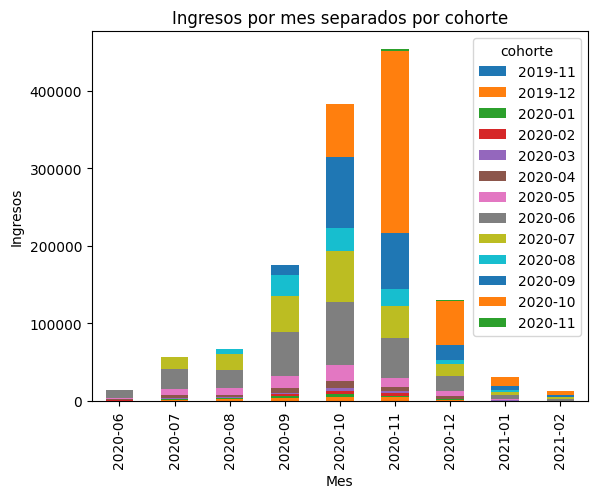

In [52]:
# 3c. Visualizar resultados
df_pivot = ingresos_mes.pivot(index='año_mes_ingreso', columns='cohorte', values='ingresos').fillna(0)
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.title('Ingresos por mes separados por cohorte')
plt.show()

In [53]:
#Como esperabamos las columnas muestran una distribución similar a las entradas pero desplazadas en el tiempo, pues son pagadas después del adelanto. 

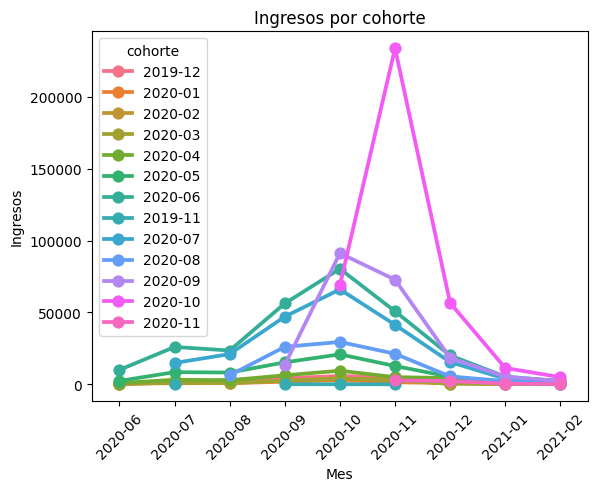

In [54]:
sns.pointplot(data=ingresos_mes, x='año_mes_ingreso', y='ingresos', hue='cohorte', marker='o')
plt.title('Ingresos por cohorte')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

# Pregunta 04

Nueva Métrica Relevante: Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

Propuestas: 

 - Relacionar adelantos con pagos